In [2]:
from CahnHilliard import *

**Theoretical introduction**

Cahn Hilliard equations describe the so called spinodal decomposition. This is an example of continous phase transformation, that can happen for example in a binary alloy. The order parameter describing this kind of phase transformations is the concentration of one metal in the alloy, call it $c$, so it is a conserved order parameter.\
The main features of spinodal decomposition can be understood by considering the free energy density of the system (the binary alloy) as function of the concentration. Indeed, two different phases of the alloy (defined by their respective concentrations $c_1$ and $c_2$) can coexist only if they share a common tangent to the free energy curve. This happens if the free energy curve has two relative minima separated by an energy barrier. The region between the inflection points delimiting the barrier is called spinodal region. In this region, where the second derivative of the free energy is negative, the evolution of the system towards equilibrium (i.e. from initial concentration $c_0$ to final concentration $c_1$ or $c_2$) can develope with continuity. This is because the variation in free energy for an infinitesiamal variation $\delta c$ of a conserved order parameter $c$ is given by:

$$
\begin{equation*}
\delta F = \frac{1}{2} (\frac{\partial^2 F}{\partial c^2}) \delta c^2
\end{equation*}
$$

so, in the spinodal region, where $\frac{\partial^2 F}{\partial c^2}$ is negative, any infinitesimal variation $\delta c$ produces an energy decrease, and so can happen spontaneously.\ 
This means that in the system regions with concentration $c_1$ in contact with regions with concentration $c_2$ will araise. At the interface between them, there will be a gradient in concentration, and so a concentration flux. So the equilibrium condition will be reached when the total energy of the system is minimized and gredients in concentratioin are as small as possible.\
We can take into account the contribution of gradients by adding to the free energy density of the homogeneous system $f^{hom}$ a term measuiring the modulus of the gradient:

$$
\begin{equation*}
f(c, \nabla c) = f^{hom}(c) + K |\nabla c|^2
\end{equation*} 
$$

Then, assuming the free energy density of the system to be given by equation (1), the total energy of the system will be a functional of the concentration $c(\vec{r}, t)$, given by:

$$
\begin{equation*}
F = \int f(c, \nabla c) \, dV
\end{equation*} 
$$

Then, if we compute how the variation in total free energy $\delta F$ is related to the variation in concentration $\delta c$, the potential to change $c(\vec{r}, t)$ will be given by: 

$$
\begin{equation*}
\Phi(\vec{r}) = \frac{\partial f^{hom}}{\partial c} - 2 K \nabla ^ 2 c
\end{equation*}
$$

Now, since the concentration is a conserved order parameter, the evolution of the concentration profile $c(\vec{r}, t)$ is given by the continuity equation:

$$
\begin{equation*}
\frac{\partial c}{\partial t} = - \nabla \cdot \vec{J} \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \vec{J} = - M \nabla \Phi
\end{equation*}
$$

and assuming M to be constant with respect to position, substituting the expression for $\Phi$, we get the Cahn Hilliard equation:

$$
\begin{equation*}
\frac{\partial c}{\partial t} = M \nabla^2 (\frac{\partial f^{hom}}{\partial c} - 2 K \nabla ^ 2 c)
\end{equation*}
$$

Now we can make an assumption about the form of the homogenenous free energy density function. The simplest one is a forth order polynomial of the kind:

$$
\begin{equation*}
f^{hom} (c) = \gamma (c - c_0 + \delta)^2 (c - c_0 - \delta)^2
\end{equation*}
$$

shown in figure

<p align="center">
    <img src="imgs/free_energy_density.png" alt="Free energy density">
</p>

Then if we set $\gamma = 1$, $\delta = 1$, $c_0 = 0$, we get the final equation that we are going to solve numerically:

\begin{equation*}
\frac{\partial c}{\partial t} = M \nabla^2 (c^3 - c - a \nabla^2 c)
\end{equation*}

In [3]:
L = 40
N = 400
dx = L / N
dy = L / N

mean concentration: 0.000015


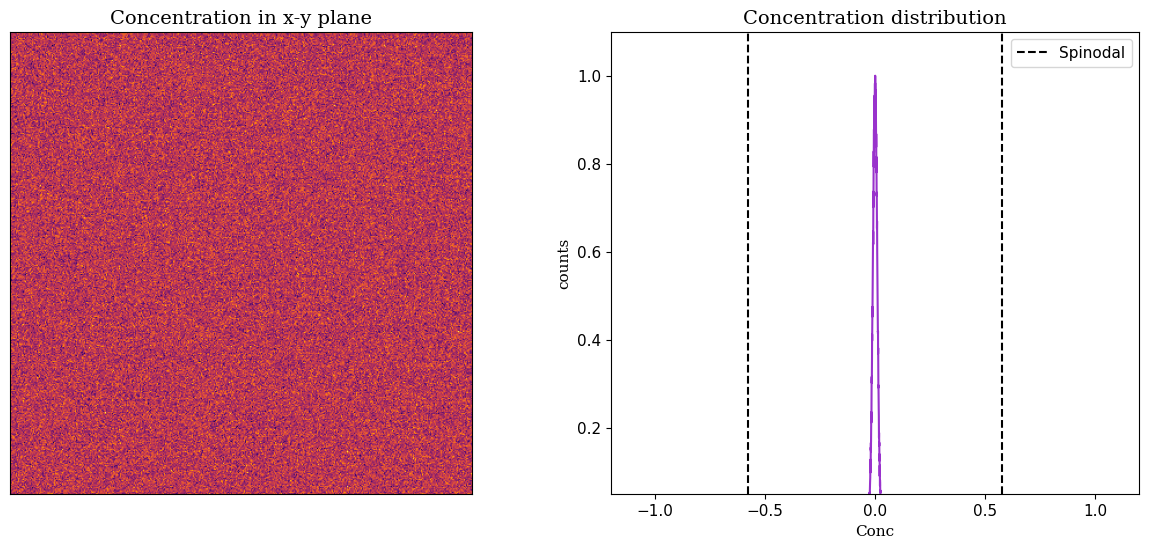

In [4]:

x, y = np.meshgrid(np.linspace(-L/2, L/2, N), np.linspace(-L/2, L/2, N))
mean = 0.0 # must be less than 0.69
conc0 = np.zeros((N, N)) + mean

D = dx**2 * 3 # diffusivity cm**2 / s
gamma = 500
beta = N / dx / gamma # in this way fastest growing wavelength is 2*pi * L/gamma
a = dx**4 * beta**2 # fastest growing componet is 1/sqrt(a)

amp = 0.01
conc0 = conc0 + amp * np.random.randn(N, N)

print(f'mean concentration: {np.mean(conc0):2f}')

fig, ax = plt.subplots(1,2 , figsize=(15, 6))
ax[0].imshow(conc0, cmap='inferno')
ax[0].set_title(f'Concentration in x-y plane', fontdict=title_font)
ax[0].set_xticks([])
ax[0].set_yticks([])

histo = np.histogram(conc0.reshape((N**2)), N)
bins = histo[1]
counts = histo[0]
ax[1].plot(bins[:-1], counts / np.max(counts), color='darkorchid')
ax[1].axvline(1/np.sqrt(3), ls='--', color='black', label='Spinodal')
ax[1].axvline(-1/np.sqrt(3), ls='--', color='black')
ax[1].set_title('Concentration distribution', fontdict=title_font)
ax[1].set_ylabel('counts', fontdict=base_font)
ax[1].set_xlabel('Conc', fontdict=base_font)
ax[1].set_xlim(-1.2, 1.2)
ax[1].set_ylim(0.05, 1.1)
ax[1].legend()
plt.show()

In [ ]:
tmax = 10
Nt = 1000
time = np.linspace(0, tmax, Nt)

CH_system = Sol_CahnHilliard(L, N, D, a)
CH_system.compute_sol(conc0, time)

In [ ]:
CH_system.MakeGif_sol()

In [ ]:
CH_system.ComputeFT()

In [ ]:
CH_system.MakeGif_FT()

In [ ]:
CH_system.Compute_histo()

In [ ]:
CH_system.MakeGif_tot()